# Classificação dos fungos Pós-processamento (Depois da manipulação das imagens)

In [13]:

import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import time

In [14]:
Dataset_path = "../defungi_dataset_processed"
Image_size = (64, 128)
HOG_orientation = 9
HOG_pixels_per_cell = (8, 8)
HoG_cells_per_block = (2, 2)


In [15]:
# extrair dados

data = []
labels = []

classes_names = [d for d in os.listdir(Dataset_path) if os.path.isdir(os.path.join(Dataset_path, d))]
label_mapping = {name: i for i, name in enumerate(classes_names)}

for nome_classe,label_id in label_mapping.items():
    class_path = os.path.join(Dataset_path, nome_classe)
    for nome_imagem in os.listdir(class_path):
        image_path = os.path.join(class_path,nome_imagem)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_path}")
            continue

        resized_image = cv2.resize(image, Image_size)
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        data.append(gray_image)
        labels.append(label_id)



In [16]:
# transformar as imagens em HOG features
hog_features = []
for image in data:
    features = hog(image, 
                   orientations=HOG_orientation, 
                   pixels_per_cell=HOG_pixels_per_cell, 
                   cells_per_block=HoG_cells_per_block, 
                   block_norm='L2-Hys', 
                   visualize=False)
    hog_features.append(features)


In [17]:
X = np.array(hog_features)
y = np.array(labels)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"Total de imagens: {len(data)}")
print(f"Total de classes: {len(classes_names)}")
print(f"Total de imagens de treino: {len(X_train)}")
print(f"Total de imagens de teste: {len(X_test)}")


Total de imagens: 9114
Total de classes: 5
Total de imagens de treino: 7291
Total de imagens de teste: 1823


# SVM

In [18]:
model = SVC(kernel='linear', probability=True,C=1.0, random_state=42)
model.fit(X_train, y_train)
print("Modelo treinado com sucesso!")
y_pred = model.predict(X_test)


Modelo treinado com sucesso!


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("\n--- RESULTADOS DA AVALIAÇÃO ---")
print(f"Acurácia do modelo: {accuracy:.2%}")
print("\nRelatório de Classificação:")
    
# Inverte o mapa de rótulos para mostrar os nomes das classes no relatório
target_names = [name for name, i in sorted(label_mapping.items(), key=lambda item: item[1])]
print(classification_report(y_test, y_pred, target_names=target_names))


--- RESULTADOS DA AVALIAÇÃO ---
Acurácia do modelo: 46.74%

Relatório de Classificação:
              precision    recall  f1-score   support

         TSH       0.61      0.68      0.64       884
        BASH       0.35      0.27      0.30       486
         GMA       0.19      0.21      0.20       155
         SHC       0.32      0.34      0.33       157
         BBH       0.28      0.23      0.25       141

    accuracy                           0.47      1823
   macro avg       0.35      0.35      0.34      1823
weighted avg       0.45      0.47      0.46      1823



# Matriz de confusão

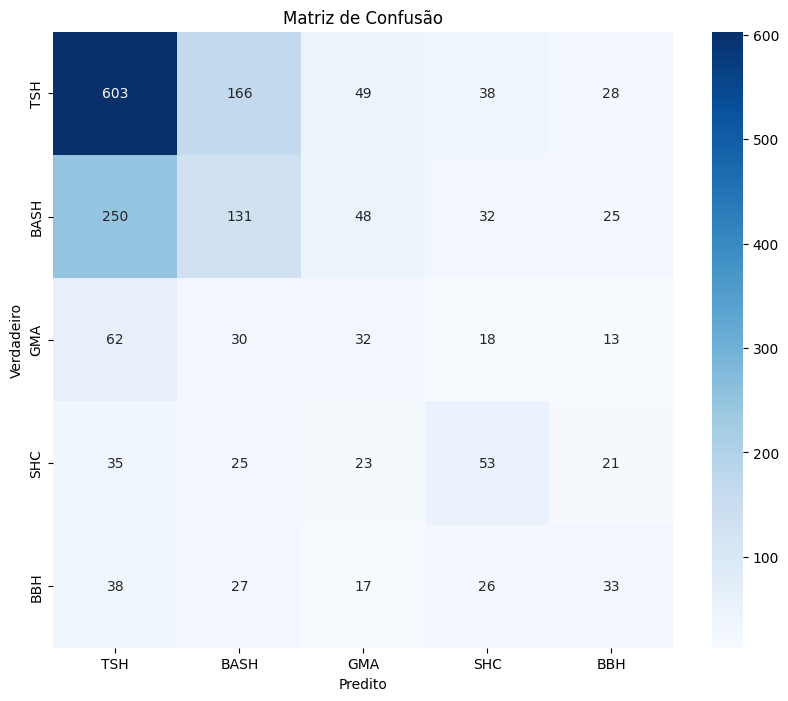

In [20]:
# matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# Como ficaram as 10 primeiras e 10 últimas imagens de cada pasta


Primeiras 10 imagens da pasta 'TSH':


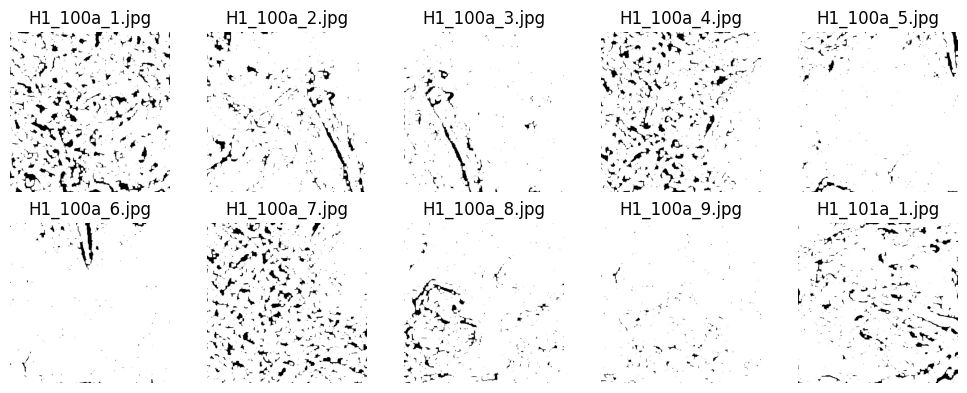

In [24]:
# Primeira pasta
first_class = classes_names[0]
first_class_path = os.path.join(Dataset_path, first_class)
first_class_images = os.listdir(first_class_path)[:10]
print(f"\nPrimeiras 10 imagens da pasta '{first_class}':")

# Carregar as imagens
images = []
for img_name in first_class_images:
    img_path = os.path.join(first_class_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        images.append(img)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # BGR → RGB para mostrar corretamente
        ax.imshow(img_rgb)
        ax.set_title(first_class_images[i])
    ax.axis("off")

plt.tight_layout()
plt.show()


Primeiras 10 imagens da pasta 'BASH':


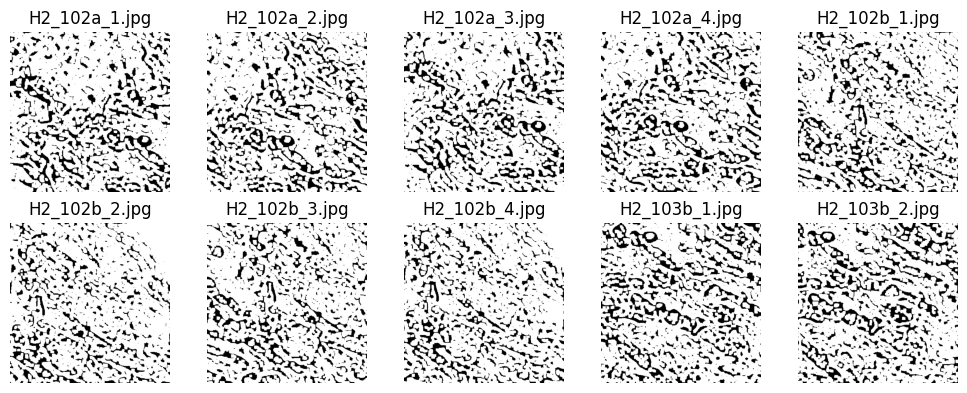

In [23]:
#Segunda pasta
second_class = classes_names[1]
second_class_path = os.path.join(Dataset_path, second_class)
second_class_images = os.listdir(second_class_path)[:10]
print(f"\nPrimeiras 10 imagens da pasta '{second_class}':")

# Carregar as imagens
images = []
for img_name in second_class_images:
    img_path = os.path.join(second_class_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        images.append(img)

nrows, ncols = 2, 5  # 2 linhas, 5 colunas para 10 imagens
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(second_class_images[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#aplica o kernel para a segmentação e atribui a imagem a uma lista com a
ka